# 8-2. XGBoost, LightGBM
- 트리 기반의 앙상블 기법
- 분류에 있어서 다른 알고리즘보다 좋은 예측 성능을 보여줌
- 회귀보다는 분류에서 높은 성능을 보여줌
- XGBoost는 GBM 기반이지만, GBM의 단점인 느린 수행 시간과 과적합 규제 부재 등의 문제를 해결
- 병렬 CPU 환경에서 빠르게 학습 가능
- XGBoost 참고: https://injo.tistory.com/44
- LightGBM 참고: https://injo.tistory.com/48

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import multiprocessing
import xgboost as xgb
import lightgbm as lgbm
plt.style.use(["seaborn-whitegrid"])

from xgboost import XGBClassifier, XGBRegressor, plot_importance, plot_tree
from lightgbm import LGBMClassifier, LGBMRegressor, plot_tree, plot_importance, plot_metric
from sklearn.datasets import load_breast_cancer, load_iris, load_diabetes, fetch_california_housing
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.manifold import TSNE
from math import sqrt
from itertools import product

/var/folders/79/v97_0rqs3p34z9xx6y57xks80000gn/T/ipykernel_3843/2407620421.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(["seaborn-whitegrid"])


In [5]:
# 보스턴 주택 가격 데이터 불러오기
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
boston_data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
boston_target = raw_df.values[1::2, 2]
boston_feature_names = ["crim", "zn", "indus", "chas", "nox", "rm", "age", "dis", "rad", "tax", "ptratio", "b", "lstat"]

boston_df = pd.DataFrame(boston_data)
boston_df["Target"] = boston_target
X, y = boston_data, boston_target

## XGBoost

### 분류 - Classifier

#### 유방암 데이터

In [6]:
# 유방암 데이터 불러오기
cancer = load_breast_cancer()

# 데이터프레임으로 만들기
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df["Target"] = cancer.target
types = cancer_df["Target"].astype(dtype="category").cat.rename_categories(cancer.target_names)
types = list(np.unique(types))

# 학습/테스트 데이터 셋 분리
X = cancer_df.loc[:, cancer_df.columns != "Target"]
y = cancer_df["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
evals = [(X_test, y_test)]

# XGBoost 학습 및 예측 데이터 생성
xgbc = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgbc.fit(X_train, y_train, eval_set=evals)
y_train_predict = xgbc.predict(X_train)
y_test_predict = xgbc.predict(X_test)

# 학습 데이터 모델 평가(Accuracy, F1)
acc = accuracy_score(y_train, y_train_predict)
f1 = f1_score(y_train, y_train_predict)
print("Train Accuracy Score: {}".format(acc))
print("Train F1 Score: {}".format(f1))

# 평가 데이터 모델 평가(Accuracy, F1)
acc = accuracy_score(y_test, y_test_predict)
f1 = f1_score(y_test, y_test_predict)
print("Test Accuracy Score: {}".format(acc))
print("Test F1 Score: {}".format(f1))

[0]	validation_0-logloss:0.61010
[1]	validation_0-logloss:0.54074
[2]	validation_0-logloss:0.48490
[3]	validation_0-logloss:0.43922
[4]	validation_0-logloss:0.39791
[5]	validation_0-logloss:0.36211
[6]	validation_0-logloss:0.32996
[7]	validation_0-logloss:0.30179
[8]	validation_0-logloss:0.27801
[9]	validation_0-logloss:0.25775
[10]	validation_0-logloss:0.24037
[11]	validation_0-logloss:0.22271
[12]	validation_0-logloss:0.20795
[13]	validation_0-logloss:0.19531
[14]	validation_0-logloss:0.18460
[15]	validation_0-logloss:0.17183
[16]	validation_0-logloss:0.16152
[17]	validation_0-logloss:0.15443
[18]	validation_0-logloss:0.14913
[19]	validation_0-logloss:0.14175


[20]	validation_0-logloss:0.13378
[21]	validation_0-logloss:0.12809
[22]	validation_0-logloss:0.12310
[23]	validation_0-logloss:0.11735
[24]	validation_0-logloss:0.11254
[25]	validation_0-logloss:0.11103
[26]	validation_0-logloss:0.10784
[27]	validation_0-logloss:0.10638
[28]	validation_0-logloss:0.10329
[29]	validation_0-logloss:0.10023
[30]	validation_0-logloss:0.09733
[31]	validation_0-logloss:0.09495
[32]	validation_0-logloss:0.09249
[33]	validation_0-logloss:0.09052
[34]	validation_0-logloss:0.08892
[35]	validation_0-logloss:0.08715
[36]	validation_0-logloss:0.08597
[37]	validation_0-logloss:0.08400
[38]	validation_0-logloss:0.08311
[39]	validation_0-logloss:0.08118
[40]	validation_0-logloss:0.07966
[41]	validation_0-logloss:0.07900
[42]	validation_0-logloss:0.07876
[43]	validation_0-logloss:0.07849
[44]	validation_0-logloss:0.07727
[45]	validation_0-logloss:0.07715
[46]	validation_0-logloss:0.07628
[47]	validation_0-logloss:0.07591
[48]	validation_0-logloss:0.07610
[49]	validatio

- 교차검증 수행

In [7]:
# 교차검증 수행
score = cross_validate(estimator=xgbc,
                       X=X, y=y,
                       cv=5,
                       n_jobs=multiprocessing.cpu_count(),
                       scoring="accuracy")

# 교차검증 결과
print("avg fit time: {} (+/- {})".format(score["fit_time"].mean(), score["fit_time"].std()))
print("avg score time: {} (+/- {})".format(score["score_time"].mean(), score["score_time"].std()))
print("avg test score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

avg fit time: 0.16902241706848145 (+/- 0.005057381941831752)
avg score time: 0.0016351699829101562 (+/- 9.879055579087697e-05)
avg test score: 0.9736376339077782 (+/- 0.009609619188189153)


- 피처 중요도

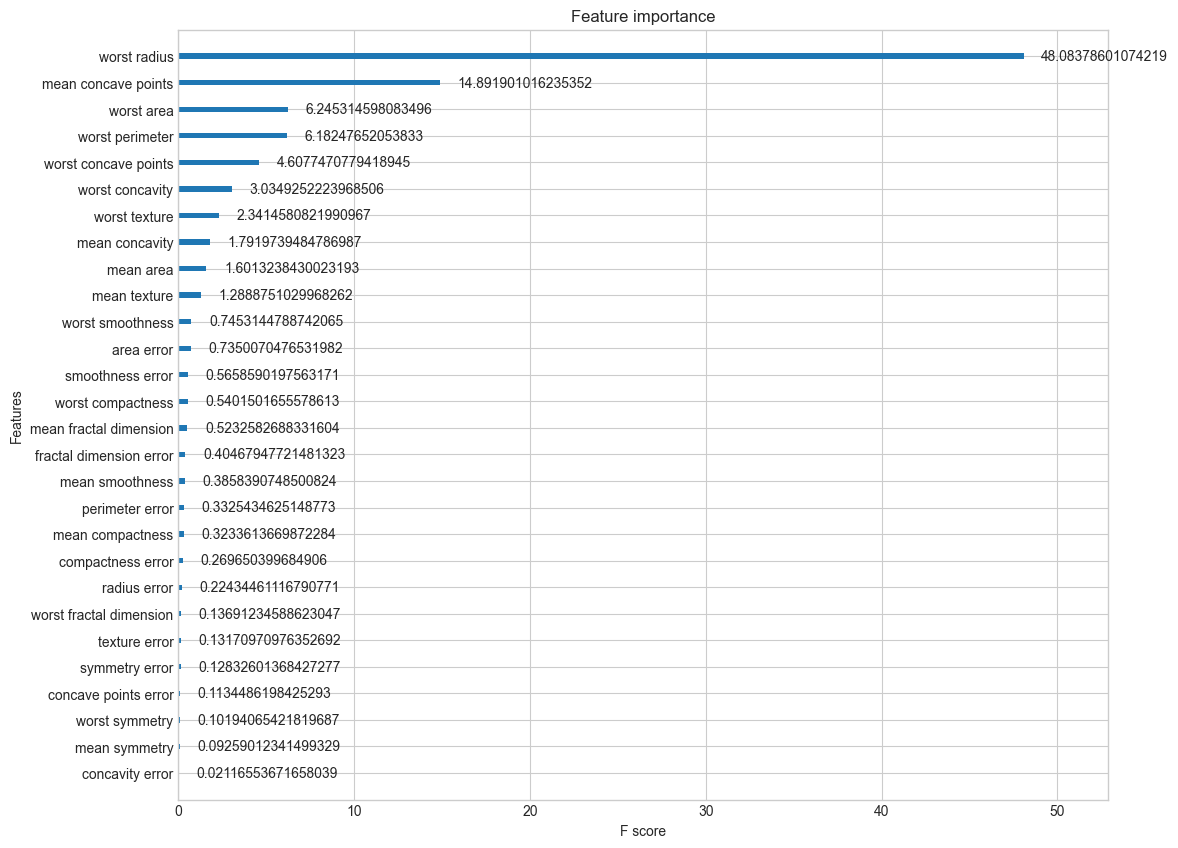

In [8]:
fig, ax = plt.subplots(figsize=(12, 10))
xgb.plot_importance(booster=xgbc,
                    importance_type="gain",
                    ax=ax);

- 트리 시각화

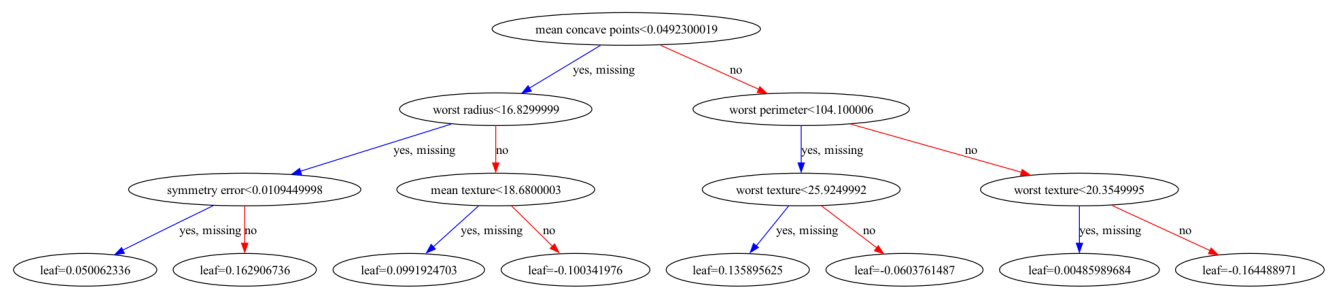

In [9]:
fig, ax = plt.subplots(figsize=(17, 15))
xgb.plot_tree(booster=xgbc,
              num_trees=2,
              ax=ax);

- 결정경계 시각화

In [10]:
# 격자 그리드 형태 데이터들을 생성할 함수
def get_meshgrid(x, y, h=0.02):
    xx, yy = np.meshgrid(np.arange(x.min()-1, x.max()+1, h), np.arange(y.min()-1, y.max()+1, h))
    return xx, yy

# 그래프에 각 클래스에 대한 영역을 구분해줄 함수
def get_contourf(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    return plt.contourf(xx, yy, Z, **params)

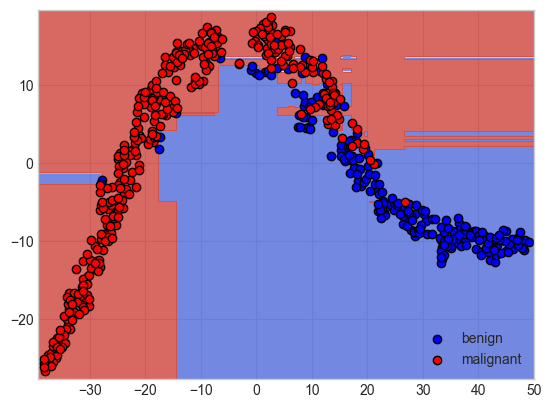

In [11]:
# 그래프에 나타내기 위해 차원 축소
X_comp = TSNE(n_components=2).fit_transform(X)

# 차원 축소한 데이터를 XGBoost 학습
xgbc = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgbc.fit(X_comp, y)

# 각 클래스의 영역을 구분할 데이터들을 생성
xx, yy = get_meshgrid(X_comp[:, 0], X_comp[:, 1])

# 영역을 구분할 데이터들을 분류 및 영역 구분
get_contourf(xgbc, xx, yy, alpha=0.8, cmap=plt.cm.coolwarm)

# 분류된 데이터들을 산점도로 시각화
colors = ["b", "r"]
for i in range(len(np.unique(types))):
    plt.scatter(X_comp[y == i, 0], X_comp[y == i, 1], color=colors[i], edgecolors="k", label=types[i])

plt.legend(loc="lower right")
plt.show()

#### 붓꽃 데이터

In [340]:
# 붓꽃 데이터 불러오기
iris = load_iris()

# 데이터프레임으로 만들기
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df["Target"] = iris.target
species = iris_df["Target"].astype(dtype="category").cat.rename_categories(iris.target_names)
species = list(np.unique(species))

# 학습/테스트 데이터 셋 분리
X = iris_df.loc[:, iris_df.columns != "Target"]
y = iris_df["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
evals = [(X_test, y_test)]

# XGBoost 학습 및 예측 데이터 생성
xgbc = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgbc.fit(X_train, y_train, eval_set=evals)
y_train_predict = xgbc.predict(X_train)
y_test_predict = xgbc.predict(X_test)

# 학습 데이터 모델 평가(Accuracy, F1)
acc = accuracy_score(y_train, y_train_predict)
f1 = f1_score(y_train, y_train_predict, average=None)
print("Train Accuracy Score: {}".format(acc))
print("Train F1 Score: {}".format(f1))

# 평가 데이터 모델 평가(Accuracy, F1)
acc = accuracy_score(y_test, y_test_predict)
f1 = f1_score(y_test, y_test_predict, average=None)
print("Test Accuracy Score: {}".format(acc))
print("Test F1 Score: {}".format(f1))

[0]	validation_0-mlogloss:0.97070
[1]	validation_0-mlogloss:0.86332
[2]	validation_0-mlogloss:0.77189
[3]	validation_0-mlogloss:0.69318
[4]	validation_0-mlogloss:0.62486
[5]	validation_0-mlogloss:0.56471
[6]	validation_0-mlogloss:0.51138
[7]	validation_0-mlogloss:0.46431
[8]	validation_0-mlogloss:0.42260
[9]	validation_0-mlogloss:0.38551
[10]	validation_0-mlogloss:0.35245
[11]	validation_0-mlogloss:0.32326
[12]	validation_0-mlogloss:0.29683
[13]	validation_0-mlogloss:0.27350
[14]	validation_0-mlogloss:0.25214
[15]	validation_0-mlogloss:0.23332
[16]	validation_0-mlogloss:0.21583
[17]	validation_0-mlogloss:0.20013
[18]	validation_0-mlogloss:0.18701
[19]	validation_0-mlogloss:0.17476
[20]	validation_0-mlogloss:0.16418
[21]	validation_0-mlogloss:0.15341
[22]	validation_0-mlogloss:0.14487
[23]	validation_0-mlogloss:0.13666
[24]	validation_0-mlogloss:0.12924
[25]	validation_0-mlogloss:0.12392
[26]	validation_0-mlogloss:0.11932
[27]	validation_0-mlogloss:0.11527
[28]	validation_0-mlogloss:0.1

- 교차검증 수행

In [341]:
# 교차검증 수행
score = cross_validate(estimator=xgbc,
                       X=X, y=y,
                       cv=5,
                       n_jobs=multiprocessing.cpu_count(),
                       scoring="accuracy")

# 교차검증 결과
print("avg fit time: {} (+/- {})".format(score["fit_time"].mean(), score["fit_time"].std()))
print("avg score time: {} (+/- {})".format(score["score_time"].mean(), score["score_time"].std()))
print("avg test score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

avg fit time: 0.10506796836853027 (+/- 0.0022584345705845867)
avg score time: 0.002521228790283203 (+/- 4.674546318156566e-05)
avg test score: 0.96 (+/- 0.024944382578492935)


- 피처 중요도

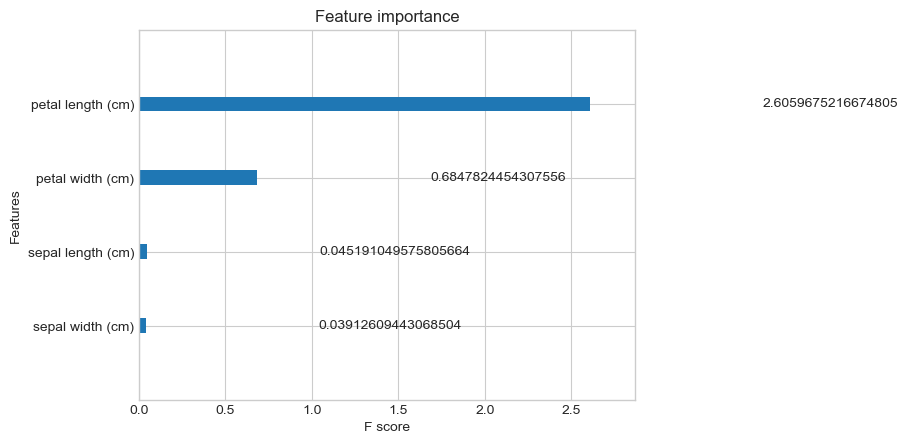

In [342]:
xgb.plot_importance(booster=xgbc,
                    importance_type="gain");

- 트리 시각화

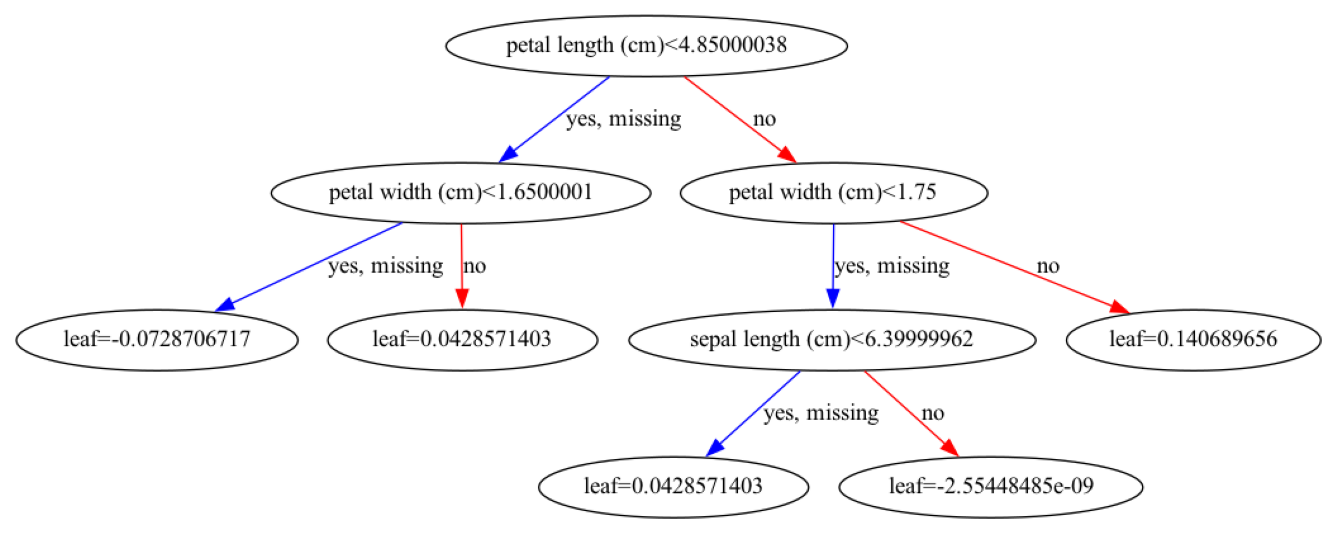

In [343]:
fig, ax = plt.subplots(figsize=(17, 15))
xgb.plot_tree(booster=xgbc,
              num_trees=2,
              ax=ax);

- 결정경계 시각화

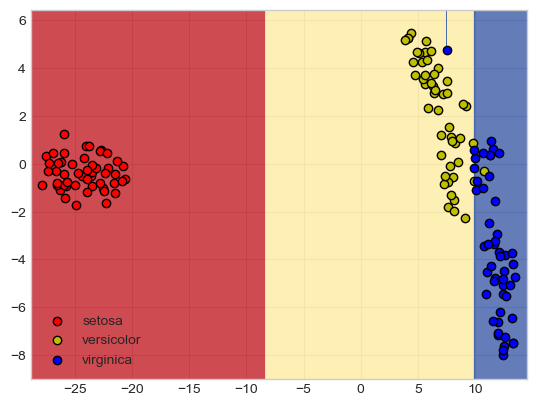

In [344]:
# 그래프에 나타내기 위해 차원 축소
X_comp = TSNE(n_components=2).fit_transform(X)

# 차원 축소한 데이터를 XGBoost 학습
xgbc = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgbc.fit(X_comp, y)

# 각 클래스의 영역을 구분할 데이터들을 생성
xx, yy = get_meshgrid(X_comp[:, 0], X_comp[:, 1])

# 영역을 구분할 데이터들을 분류 및 영역 구분
get_contourf(xgbc, xx, yy, alpha=0.8, cmap=plt.cm.RdYlBu)

# 분류된 데이터들을 산점도로 시각화
colors = ["r", "y", "b"]
for i in range(len(np.unique(species))):
    plt.scatter(X_comp[y == i, 0], X_comp[y == i, 1], color=colors[i], edgecolors="k", label=species[i])

plt.legend(loc="lower left")
plt.show()

### 회귀 - Regressor

#### 보스턴 주택 가격

In [345]:
# 데이터프레임으로 만들기
boston_df = pd.DataFrame(boston_data, columns=boston_feature_names)
boston_df["Target"] = boston_target

# 학습/테스트 데이터 셋 분리
X = boston_df.loc[:, boston_df.columns != "Target"]
y = boston_df["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
evals = [(X_test, y_test)]

# XGBoost 학습 및 예측 데이터 생성
xgbr = XGBRegressor(n_estimators=300, max_depth=3, learning_rate=0.1, objective="reg:squarederror")
xgbr.fit(X_train, y_train, eval_set=evals, eval_metric="logloss")
y_train_predict = xgbr.predict(X_train)
y_test_predict = xgbr.predict(X_test)

# 학습 데이터 모델 평가
r2 = r2_score(y_train, y_train_predict)
rmse = sqrt(mean_squared_error(y_train, y_train_predict))
print("Train R2 Score: {}".format(r2))
print("Train RMSE Score: {}".format(rmse))

# 평가 데이터 모델 평가
r2 = r2_score(y_test, y_test_predict)
rmse = sqrt(mean_squared_error(y_test, y_test_predict))
print("Train R2 Score: {}".format(r2))
print("Train RMSE Score: {}".format(rmse))

[0]	validation_0-logloss:-840.43565
[1]	validation_0-logloss:-853.12862
[2]	validation_0-logloss:-860.76311
[3]	validation_0-logloss:-865.89120
[4]	validation_0-logloss:-869.79168
[5]	validation_0-logloss:-872.80363
[6]	validation_0-logloss:-875.30379
[7]	validation_0-logloss:-877.31401
[8]	validation_0-logloss:-879.02577
[9]	validation_0-logloss:-880.48386
[10]	validation_0-logloss:-881.70297
[11]	validation_0-logloss:-882.75489
[12]	validation_0-logloss:-883.66637
[13]	validation_0-logloss:-884.46054
[14]	validation_0-logloss:-885.10032
[15]	validation_0-logloss:-885.72395
[16]	validation_0-logloss:-886.27581
[17]	validation_0-logloss:-886.71630
[18]	validation_0-logloss:-887.14379
[19]	validation_0-logloss:-887.53587
[20]	validation_0-logloss:-887.82149
[21]	validation_0-logloss:-888.07429
[22]	validation_0-logloss:-888.33536
[23]	validation_0-logloss:-888.55381
[24]	validation_0-logloss:-888.77589
[25]	validation_0-logloss:-888.95001
[26]	validation_0-logloss:-889.11855
[27]	valida

/Users/yanghaejun/opt/anaconda3/envs/yang_conda/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[117]	validation_0-logloss:-890.86022
[118]	validation_0-logloss:-890.86272
[119]	validation_0-logloss:-890.86442
[120]	validation_0-logloss:-890.86132
[121]	validation_0-logloss:-890.86067
[122]	validation_0-logloss:-890.86322
[123]	validation_0-logloss:-890.86752
[124]	validation_0-logloss:-890.86610
[125]	validation_0-logloss:-890.86685
[126]	validation_0-logloss:-890.86367
[127]	validation_0-logloss:-890.86594
[128]	validation_0-logloss:-890.87020
[129]	validation_0-logloss:-890.86652
[130]	validation_0-logloss:-890.86704
[131]	validation_0-logloss:-890.87033
[132]	validation_0-logloss:-890.87752
[133]	validation_0-logloss:-890.87522
[134]	validation_0-logloss:-890.87717
[135]	validation_0-logloss:-890.87939
[136]	validation_0-logloss:-890.88075
[137]	validation_0-logloss:-890.88025
[138]	validation_0-logloss:-890.88503
[139]	validation_0-logloss:-890.88125
[140]	validation_0-logloss:-890.88582
[141]	validation_0-logloss:-890.88481
[142]	validation_0-logloss:-890.88552
[143]	valida

- 교차검증 수행

In [346]:
# 교차검증 수행
score = cross_validate(estimator=xgbr,
                       X=X, y=y,
                       cv=5,
                       n_jobs=multiprocessing.cpu_count())

# 교차검증 결과
print("avg fit time: {} (+/- {})".format(score["fit_time"].mean(), score["fit_time"].std()))
print("avg score time: {} (+/- {})".format(score["score_time"].mean(), score["score_time"].std()))
print("avg test score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

avg fit time: 0.1331636905670166 (+/- 0.0013619992661150044)
avg score time: 0.0027298927307128906 (+/- 8.092461839729877e-05)
avg test score: 0.6907302602357146 (+/- 0.1636533235976239)


- 피처 중요도

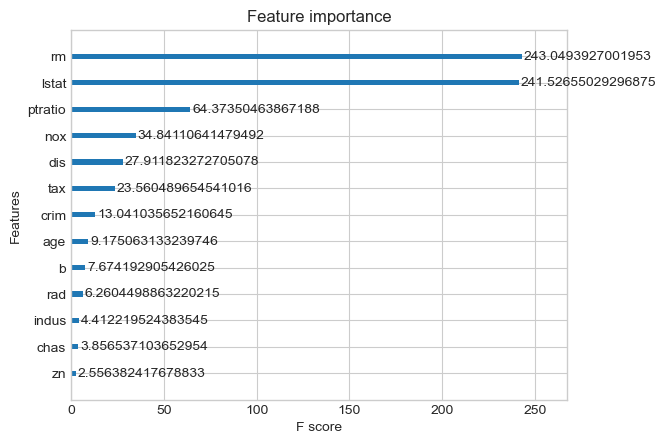

In [347]:
xgb.plot_importance(booster=xgbr,
                    importance_type="gain");

- 트리 시각화

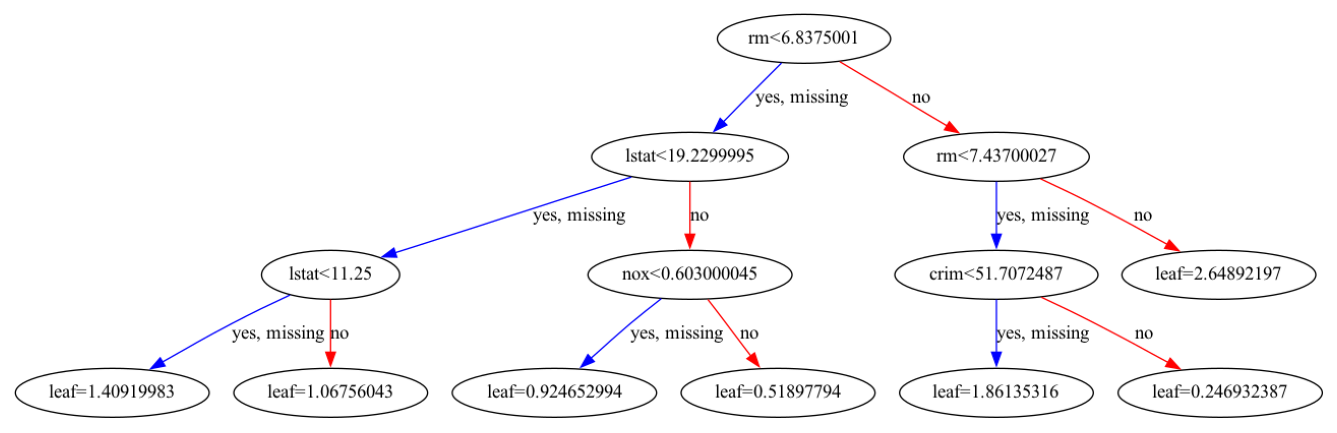

In [348]:
fig, ax = plt.subplots(figsize=(17, 15))
xgb.plot_tree(booster=xgbr,
              num_trees=5,
              ax=ax);

- 산점도 시각화

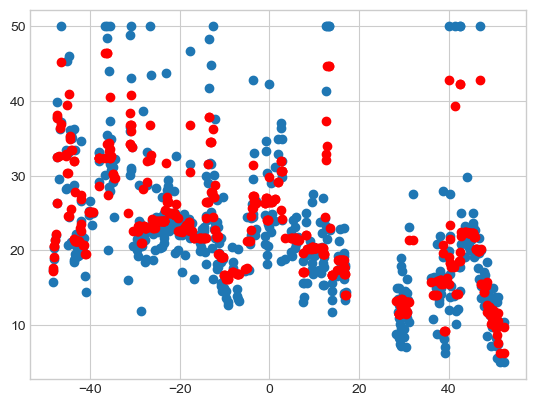

In [349]:
# 그래프에 나타내기 위해 차원 축소
X_comp = TSNE(n_components=1).fit_transform(X)

# 차원 축소한 데이터를 XGBoost 학습 및 예측 데이터 생성
xgbr = XGBRegressor(n_estimators=300, max_depth=3, learning_rate=0.1, objective="reg:squarederror")
xgbr.fit(X_comp, y)
y_predict = xgbr.predict(X_comp)

# 실제 주택 가격
plt.scatter(X_comp, y)

# 예측 주택 가격
plt.scatter(X_comp, y_predict, color="r")

plt.show()

#### 캘리포니아 주택 가격

In [350]:
# 캘리포니아 주택 가격 데이터 불러오기
california = fetch_california_housing()

# 데이터프레임으로 만들기
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df["Target"] = california.target

# 학습/테스트 데이터 셋 분리
X = california_df.loc[:, california_df.columns != "Target"]
y = california_df["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
evals = [(X_test, y_test)]

# XGBoost 학습 및 예측 데이터 생성
xgbr = XGBRegressor(n_estimators=300, max_depth=3, learning_rate=0.1, objective="reg:squarederror")
xgbr.fit(X_train, y_train, eval_set=evals, eval_metric="logloss", early_stopping_rounds=100)
y_train_predict = xgbr.predict(X_train)
y_test_predict = xgbr.predict(X_test)

# 학습 데이터 모델 평가
r2 = r2_score(y_train, y_train_predict)
rmse = sqrt(mean_squared_error(y_train, y_train_predict))
print("Train R2 Score: {}".format(r2))
print("Train RMSE Score: {}".format(rmse))

# 평가 데이터 모델 평가
r2 = r2_score(y_test, y_test_predict)
rmse = sqrt(mean_squared_error(y_test, y_test_predict))
print("Train R2 Score: {}".format(r2))
print("Train RMSE Score: {}".format(rmse))

[0]	validation_0-logloss:-0.66361
[1]	validation_0-logloss:-12.26130
[2]	validation_0-logloss:-23.75347
[3]	validation_0-logloss:-29.08394
[4]	validation_0-logloss:-36.27307
[5]	validation_0-logloss:-38.14159
[6]	validation_0-logloss:-39.14935
[7]	validation_0-logloss:-39.91184
[8]	validation_0-logloss:-40.26264
[9]	validation_0-logloss:-40.55846
[10]	validation_0-logloss:-40.61933
[11]	validation_0-logloss:-40.71818
[12]	validation_0-logloss:-40.79087
[13]	validation_0-logloss:-40.84836
[14]	validation_0-logloss:-40.89674
[15]	validation_0-logloss:-40.95457
[16]	validation_0-logloss:-40.98890


/Users/yanghaejun/opt/anaconda3/envs/yang_conda/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/yanghaejun/opt/anaconda3/envs/yang_conda/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-logloss:-41.02087
[18]	validation_0-logloss:-41.05475
[19]	validation_0-logloss:-41.07756
[20]	validation_0-logloss:-41.13184
[21]	validation_0-logloss:-41.15180
[22]	validation_0-logloss:-41.24277
[23]	validation_0-logloss:-41.25617
[24]	validation_0-logloss:-41.27054
[25]	validation_0-logloss:-41.28501
[26]	validation_0-logloss:-41.30541
[27]	validation_0-logloss:-41.33641
[28]	validation_0-logloss:-41.39263
[29]	validation_0-logloss:-41.40185
[30]	validation_0-logloss:-41.43495
[31]	validation_0-logloss:-41.45208
[32]	validation_0-logloss:-41.46967
[33]	validation_0-logloss:-41.48188
[34]	validation_0-logloss:-41.49229
[35]	validation_0-logloss:-41.52939
[36]	validation_0-logloss:-41.52826
[37]	validation_0-logloss:-41.52152
[38]	validation_0-logloss:-41.53752
[39]	validation_0-logloss:-41.54804
[40]	validation_0-logloss:-41.56255
[41]	validation_0-logloss:-41.57501
[42]	validation_0-logloss:-41.58349
[43]	validation_0-logloss:-41.59137
[44]	validation_0-logloss:-4

- 교차검증 수행

In [351]:
# 교차검증 수행
score = cross_validate(estimator=xgbr,
                       X=X, y=y,
                       cv=5,
                       n_jobs=multiprocessing.cpu_count())

# 교차검증 결과
print("avg fit time: {} (+/- {})".format(score["fit_time"].mean(), score["fit_time"].std()))
print("avg score time: {} (+/- {})".format(score["score_time"].mean(), score["score_time"].std()))
print("avg test score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

avg fit time: 2.433222007751465 (+/- 0.006700267646669078)
avg score time: 0.010727596282958985 (+/- 0.00010274124666022128)
avg test score: 0.6892052867372942 (+/- 0.03845645803485983)


- 피처 중요도

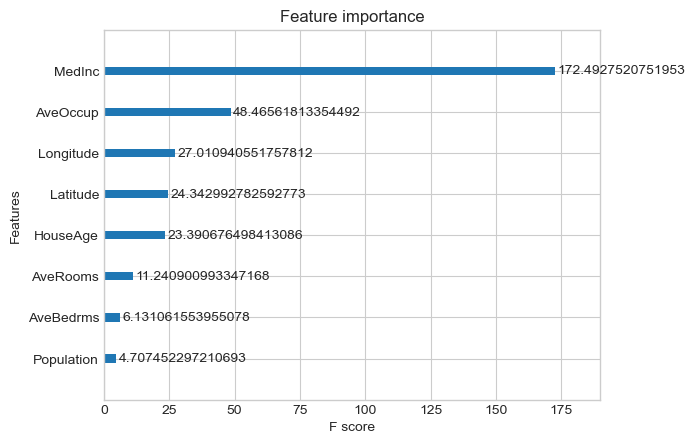

In [352]:
xgb.plot_importance(booster=xgbr,
                    importance_type="gain");

- 트리 시각화

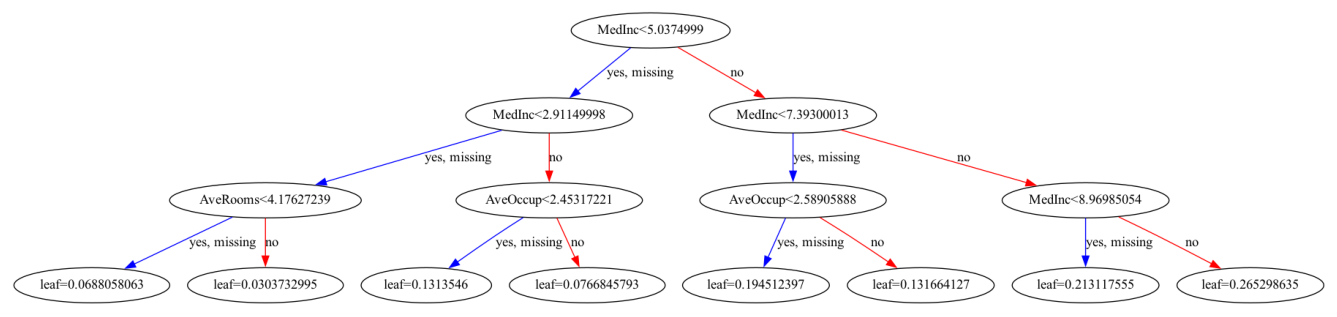

In [353]:
fig, ax = plt.subplots(figsize=(17, 15))
xgb.plot_tree(booster=xgbr,
              num_trees=5,
              ax=ax);

- 산점도 시각화

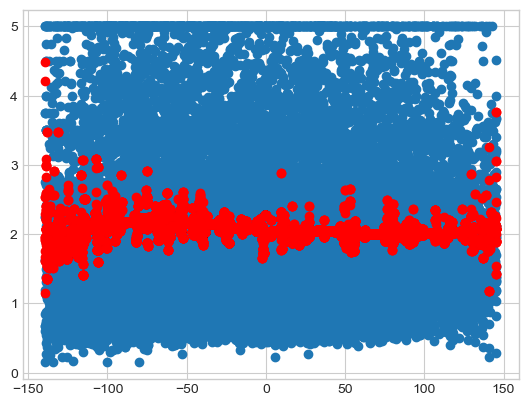

In [354]:
# 그래프에 나타내기 위해 차원 축소
X_comp = TSNE(n_components=1).fit_transform(X)

# 차원 축소한 데이터를 XGBoost 학습 및 예측 데이터 생성
xgbr = XGBRegressor(n_estimators=300, max_depth=3, learning_rate=0.1, objective="reg:squarederror")
xgbr.fit(X_comp, y)
y_predict = xgbr.predict(X_comp)

# 실제 주택 가격
plt.scatter(X_comp, y)

# 예측 주택 가격
plt.scatter(X_comp, y_predict, color="r")

plt.show()

#### 당뇨병 데이터

In [355]:
# 당뇨병 데이터 불러오기
diabetes = load_diabetes()

# 데이터프레임으로 만들기
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df["Target"] = diabetes.target

# 학습/테스트 데이터 셋 분리
X = diabetes_df.loc[:, diabetes_df.columns != "Target"]
y = diabetes_df["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
evals = [(X_test, y_test)]

# XGBoost 학습 및 예측 데이터 생성
xgbr = XGBRegressor(n_estimators=400, max_depth=3, learning_rate=0.01, objective="reg:squarederror")
xgbr.fit(X_train, y_train, eval_set=evals, eval_metric="logloss")
y_train_predict = xgbr.predict(X_train)
y_test_predict = xgbr.predict(X_test)

# 학습 데이터 모델 평가
r2 = r2_score(y_train, y_train_predict)
rmse = sqrt(mean_squared_error(y_train, y_train_predict))
print("Train R2 Score: {}".format(r2))
print("Train RMSE Score: {}".format(rmse))

# 평가 데이터 모델 평가
r2 = r2_score(y_test, y_test_predict)
rmse = sqrt(mean_squared_error(y_test, y_test_predict))
print("Train R2 Score: {}".format(r2))
print("Train RMSE Score: {}".format(rmse))

[0]	validation_0-logloss:-5544.97343
[1]	validation_0-logloss:-5718.93123
[2]	validation_0-logloss:-5772.31572
[3]	validation_0-logloss:-5811.30192
[4]	validation_0-logloss:-5841.49061
[5]	validation_0-logloss:-5866.81900
[6]	validation_0-logloss:-5887.94725
[7]	validation_0-logloss:-5906.62222
[8]	validation_0-logloss:-5922.80476
[9]	validation_0-logloss:-5937.53786
[10]	validation_0-logloss:-5950.82406
[11]	validation_0-logloss:-5962.72030
[12]	validation_0-logloss:-5973.87437
[13]	validation_0-logloss:-5983.94202
[14]	validation_0-logloss:-5993.49407
[15]	validation_0-logloss:-6002.31466
[16]	validation_0-logloss:-6010.49181
[17]	validation_0-logloss:-6018.29004
[18]	validation_0-logloss:-6025.52453
[19]	validation_0-logloss:-6032.42948
[20]	validation_0-logloss:-6038.94082
[21]	validation_0-logloss:-6046.02702
[22]	validation_0-logloss:-6051.95036
[23]	validation_0-logloss:-6058.04150
[24]	validation_0-logloss:-6063.41695
[25]	validation_0-logloss:-6068.47608
[26]	validation_0-logl

/Users/yanghaejun/opt/anaconda3/envs/yang_conda/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[104]	validation_0-logloss:-6229.86808
[105]	validation_0-logloss:-6230.64034
[106]	validation_0-logloss:-6231.50280
[107]	validation_0-logloss:-6232.33336
[108]	validation_0-logloss:-6233.07037
[109]	validation_0-logloss:-6233.89521
[110]	validation_0-logloss:-6234.69229
[111]	validation_0-logloss:-6235.45628
[112]	validation_0-logloss:-6236.22743
[113]	validation_0-logloss:-6236.91033
[114]	validation_0-logloss:-6237.66205
[115]	validation_0-logloss:-6238.37705
[116]	validation_0-logloss:-6239.08732
[117]	validation_0-logloss:-6239.72149
[118]	validation_0-logloss:-6240.43320
[119]	validation_0-logloss:-6241.10831
[120]	validation_0-logloss:-6241.77340
[121]	validation_0-logloss:-6242.42950
[122]	validation_0-logloss:-6243.06689
[123]	validation_0-logloss:-6243.65675
[124]	validation_0-logloss:-6244.30076
[125]	validation_0-logloss:-6244.92130
[126]	validation_0-logloss:-6245.48398
[127]	validation_0-logloss:-6246.11136
[128]	validation_0-logloss:-6246.70640
[129]	validation_0-loglos

- 교차검증 수행

In [356]:
# 교차검증 수행
score = cross_validate(estimator=xgbr,
                       X=X, y=y,
                       cv=5,
                       n_jobs=multiprocessing.cpu_count())

# 교차검증 결과
print("avg fit time: {} (+/- {})".format(score["fit_time"].mean(), score["fit_time"].std()))
print("avg score time: {} (+/- {})".format(score["score_time"].mean(), score["score_time"].std()))
print("avg test score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

avg fit time: 0.16916313171386718 (+/- 0.004564588899712106)
avg score time: 0.0030066967010498047 (+/- 0.00029564069162952314)
avg test score: 0.43075712798181237 (+/- 0.05854286491109365)


- 피처 중요도

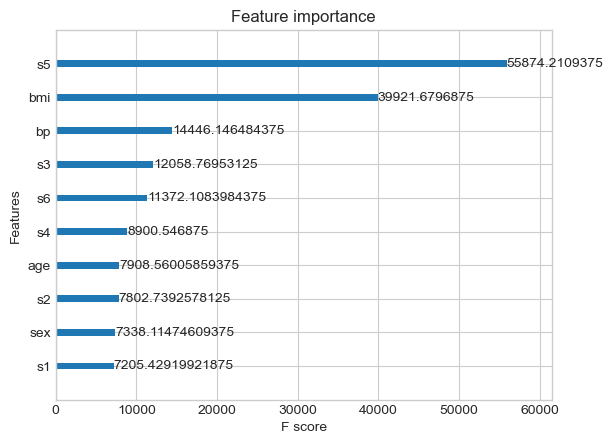

In [357]:
xgb.plot_importance(booster=xgbr,
                    importance_type="gain");

- 트리 시각화

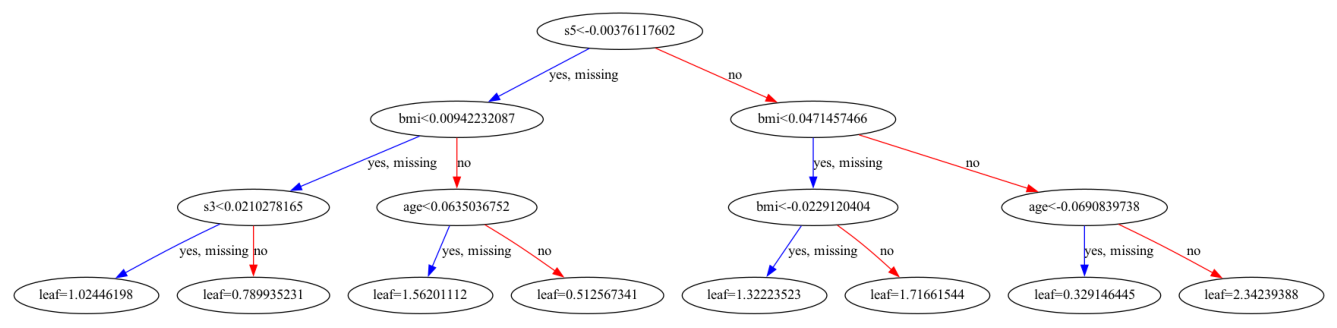

In [358]:
fig, ax = plt.subplots(figsize=(17, 15))
xgb.plot_tree(booster=xgbr,
              num_trees=5,
              ax=ax);

- 산점도 시각화

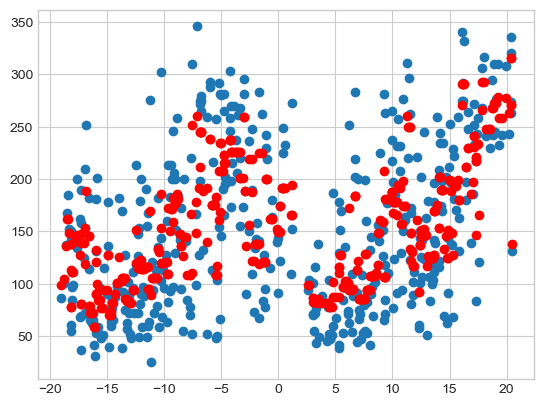

In [359]:
# 그래프에 나타내기 위해 차원 축소
X_comp = TSNE(n_components=1).fit_transform(X)

# 차원 축소한 데이터를 XGBoost 학습 및 예측 데이터 생성
xgbr = XGBRegressor(n_estimators=300, max_depth=3, learning_rate=0.1, objective="reg:squarederror")
xgbr.fit(X_comp, y)
y_predict = xgbr.predict(X_comp)

# 실제 당뇨 수치
plt.scatter(X_comp, y)

# 예측 당뇨 수치
plt.scatter(X_comp, y_predict, color="r")

plt.show()

## LightGBM
- 빠른 학습과 예측 시간
- 데이터가 많을수록 효과적일 수 있음
- 범주형 특징의 자동 변환과 최적 분할

### 분류 - Classifier

#### 유방암 데이터

In [360]:
# 유방암 데이터 불러오기
cancer = load_breast_cancer()

# 데이터프레임으로 만들기
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df["Target"] = cancer.target
types = cancer_df["Target"].astype(dtype="category").cat.rename_categories(cancer.target_names)
types = list(np.unique(types))

# 학습/테스트 데이터 셋 분리
X = cancer_df.loc[:, cancer_df.columns != "Target"]
y = cancer_df["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
evals = [(X_test, y_test)]

# LightGBM 학습 및 예측 데이터 생성
lgbmc = LGBMClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
lgbmc.fit(X_train, y_train, eval_set=evals, eval_metric="logloss", early_stopping_rounds=100)
y_train_predict = lgbmc.predict(X_train)
y_test_predict = lgbmc.predict(X_test)

# 학습 데이터 모델 평가(Accuracy, F1)
acc = accuracy_score(y_train, y_train_predict)
f1 = f1_score(y_train, y_train_predict)
print("Train Accuracy Score: {}".format(acc))
print("Train F1 Score: {}".format(f1))

# 평가 데이터 모델 평가(Accuracy, F1)
acc = accuracy_score(y_test, y_test_predict)
f1 = f1_score(y_test, y_test_predict)
print("Test Accuracy Score: {}".format(acc))
print("Test F1 Score: {}".format(f1))

[1]	valid_0's binary_logloss: 0.576454
[2]	valid_0's binary_logloss: 0.515643
[3]	valid_0's binary_logloss: 0.465892
[4]	valid_0's binary_logloss: 0.422706
[5]	valid_0's binary_logloss: 0.385462
[6]	valid_0's binary_logloss: 0.353998
[7]	valid_0's binary_logloss: 0.32753
[8]	valid_0's binary_logloss: 0.303674
[9]	valid_0's binary_logloss: 0.279513
[10]	valid_0's binary_logloss: 0.262315
[11]	valid_0's binary_logloss: 0.247702
[12]	valid_0's binary_logloss: 0.230716
[13]	valid_0's binary_logloss: 0.219833
[14]	valid_0's binary_logloss: 0.204894
[15]	valid_0's binary_logloss: 0.195179
[16]	valid_0's binary_logloss: 0.183478
[17]	valid_0's binary_logloss: 0.173669
[18]	valid_0's binary_logloss: 0.16387
[19]	valid_0's binary_logloss: 0.156138
[20]	valid_0's binary_logloss: 0.147382
[21]	valid_0's binary_logloss: 0.142958
[22]	valid_0's binary_logloss: 0.136416
[23]	valid_0's binary_logloss: 0.130166
[24]	valid_0's binary_logloss: 0.125609
[25]	valid_0's binary_logloss: 0.122006
[26]	valid_

/Users/yanghaejun/opt/anaconda3/envs/yang_conda/lib/python3.8/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


- 교차검증 수행

In [361]:
# 교차검증 수행
score = cross_validate(estimator=lgbmc,
                       X=X, y=y,
                       cv=5,
                       scoring="accuracy",
                       n_jobs=multiprocessing.cpu_count())

# 교차검증 결과
print("avg fit time: {} (+/- {})".format(score["fit_time"].mean(), score["fit_time"].std()))
print("avg score time: {} (+/- {})".format(score["score_time"].mean(), score["score_time"].std()))
print("avg test score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

avg fit time: 0.07908082008361816 (+/- 0.0037896615913653587)
avg score time: 0.00380091667175293 (+/- 0.000683211298510018)
avg test score: 0.9718987734823784 (+/- 0.014011917678875682)


- 피처 중요도

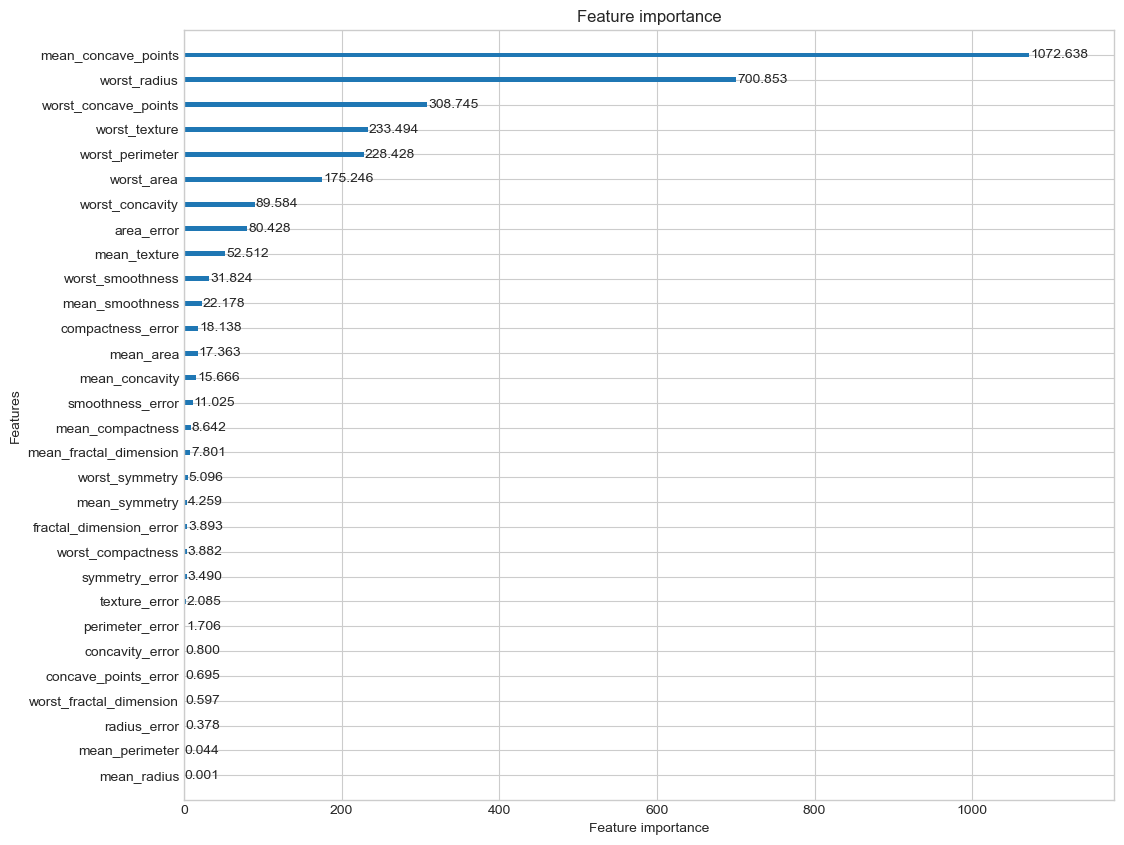

In [362]:
fig, ax = plt.subplots(figsize=(12, 10))
lgbm.plot_importance(booster=lgbmc,
                     importance_type="gain",
                     ax=ax);

- plot metric

<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

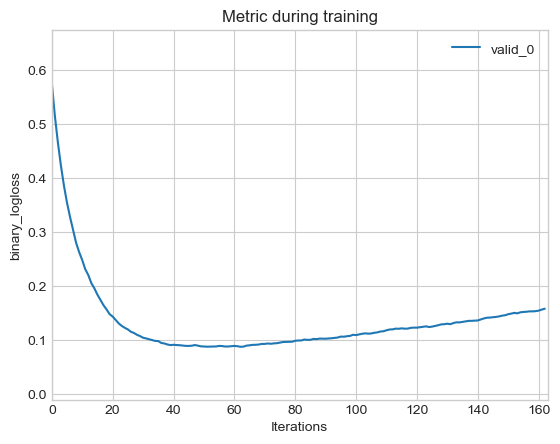

In [363]:
lgbm.plot_metric(booster=lgbmc)

- 트리 시각화

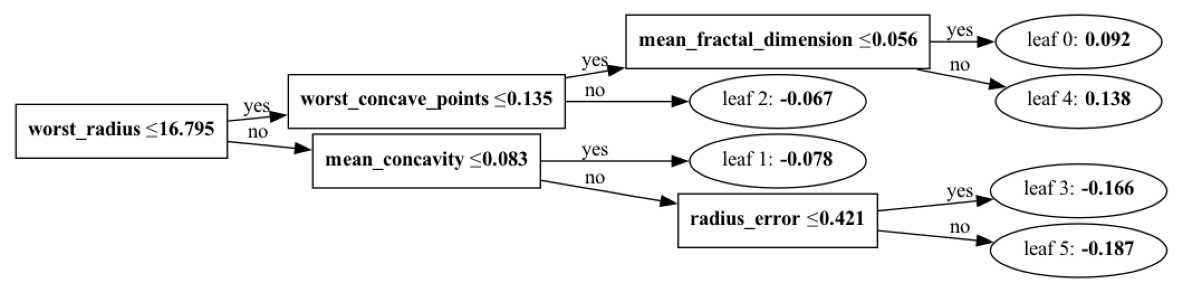

In [364]:
lgbm.plot_tree(booster=lgbmc,
               tree_index=3,
               figsize=(15, 10));

- 결정경계 시각화

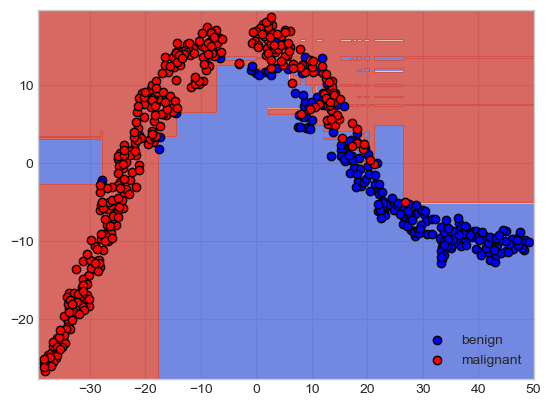

In [365]:
# 그래프에 나타내기 위해 차원 축소
X_comp = TSNE(n_components=2).fit_transform(X)

# 차원 축소한 데이터를 XGBoost 학습
lgbmc = LGBMClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
lgbmc.fit(X_comp, y, eval_metric="logloss")

# 각 클래스의 영역을 구분할 데이터들을 생성
xx, yy = get_meshgrid(X_comp[:, 0], X_comp[:, 1])

# 영역을 구분할 데이터들을 분류 및 영역 구분
get_contourf(lgbmc, xx, yy, alpha=0.8, cmap=plt.cm.coolwarm)

# 분류된 데이터들을 산점도로 시각화
colors = ["b", "r"]
for i in range(len(np.unique(types))):
    plt.scatter(X_comp[y == i, 0], X_comp[y == i, 1], color=colors[i], edgecolors="k", label=types[i])

plt.legend(loc="lower right")
plt.show()

#### 붓꽃 데이터

In [366]:
# 붓꽃 데이터 불러오기
iris = load_iris()

# 데이터프레임으로 만들기
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df["Target"] = iris.target
species = iris_df["Target"].astype(dtype="category").cat.rename_categories(iris.target_names)
species = list(np.unique(species))

# 학습/테스트 데이터 셋 분리
X = iris_df.loc[:, iris_df.columns != "Target"]
y = iris_df["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
evals = [(X_test, y_test)]

# LightGBM 학습 및 예측 데이터 생성
lgbmc = LGBMClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
lgbmc.fit(X_train, y_train, eval_set=evals, eval_metric="logloss", early_stopping_rounds=100)
y_train_predict = lgbmc.predict(X_train)
y_test_predict = lgbmc.predict(X_test)

# 학습 데이터 모델 평가(Accuracy, F1)
acc = accuracy_score(y_train, y_train_predict)
f1 = f1_score(y_train, y_train_predict, average=None)
print("Train Accuracy Score: {}".format(acc))
print("Train F1 Score: {}".format(f1))

# 평가 데이터 모델 평가(Accuracy, F1)
acc = accuracy_score(y_test, y_test_predict)
f1 = f1_score(y_test, y_test_predict, average=None)
print("Test Accuracy Score: {}".format(acc))
print("Test F1 Score: {}".format(f1))

[1]	valid_0's multi_logloss: 0.95847
[2]	valid_0's multi_logloss: 0.832188
[3]	valid_0's multi_logloss: 0.731166
[4]	valid_0's multi_logloss: 0.641056
[5]	valid_0's multi_logloss: 0.571724
[6]	valid_0's multi_logloss: 0.507285
[7]	valid_0's multi_logloss: 0.454932
[8]	valid_0's multi_logloss: 0.410202
[9]	valid_0's multi_logloss: 0.372191
[10]	valid_0's multi_logloss: 0.333916
[11]	valid_0's multi_logloss: 0.310207
[12]	valid_0's multi_logloss: 0.282322
[13]	valid_0's multi_logloss: 0.257158
[14]	valid_0's multi_logloss: 0.240831
[15]	valid_0's multi_logloss: 0.225378
[16]	valid_0's multi_logloss: 0.211576
[17]	valid_0's multi_logloss: 0.199277
[18]	valid_0's multi_logloss: 0.186257
[19]	valid_0's multi_logloss: 0.171542
[20]	valid_0's multi_logloss: 0.168341
[21]	valid_0's multi_logloss: 0.161391
[22]	valid_0's multi_logloss: 0.151672
[23]	valid_0's multi_logloss: 0.148634
[24]	valid_0's multi_logloss: 0.144711
[25]	valid_0's multi_logloss: 0.141143
[26]	valid_0's multi_logloss: 0.138

/Users/yanghaejun/opt/anaconda3/envs/yang_conda/lib/python3.8/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


- 교차검증 수행

In [367]:
# 교차검증 수행
score = cross_validate(estimator=lgbmc,
                       X=X, y=y,
                       cv=5,
                       scoring="accuracy",
                       n_jobs=multiprocessing.cpu_count())

# 교차검증 결과
print("avg fit time: {} (+/- {})".format(score["fit_time"].mean(), score["fit_time"].std()))
print("avg score time: {} (+/- {})".format(score["score_time"].mean(), score["score_time"].std()))
print("avg test score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

avg fit time: 0.05605950355529785 (+/- 0.003211141291052986)
avg score time: 0.002309226989746094 (+/- 5.1873571348553365e-05)
avg test score: 0.9533333333333334 (+/- 0.04521553322083511)


- 피처 중요도

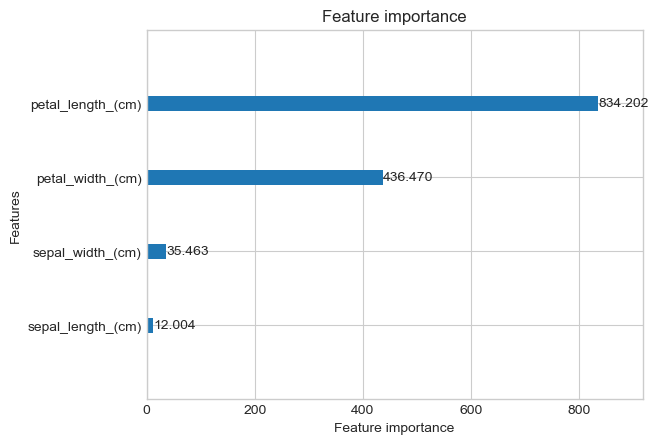

In [368]:
lgbm.plot_importance(booster=lgbmc,
                     importance_type="gain");

- plot metric

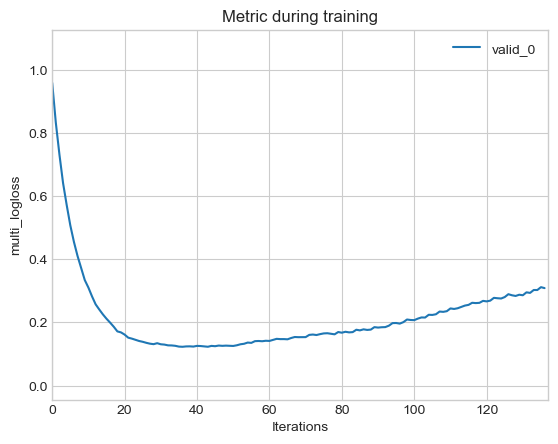

In [369]:
lgbm.plot_metric(booster=lgbmc);

- 트리 시각화

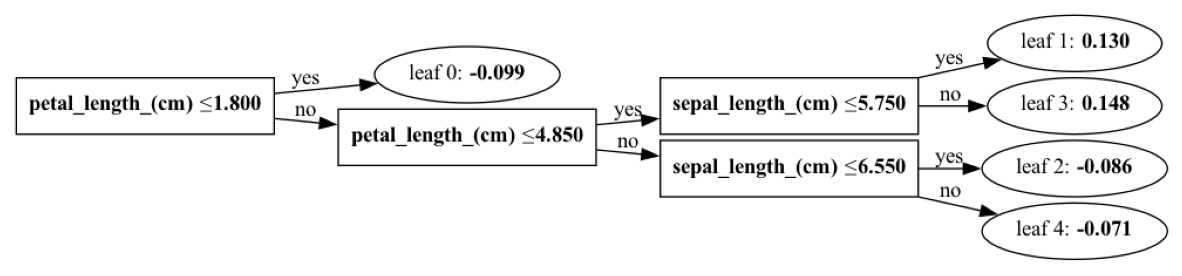

In [370]:
lgbm.plot_tree(booster=lgbmc,
               tree_index=4,
               figsize=(15, 10));

- 결정경계 시각화

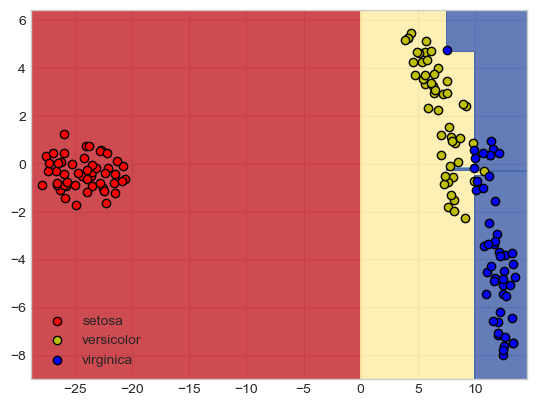

In [371]:
# 그래프에 나타내기 위해 차원 축소
X_comp = TSNE(n_components=2).fit_transform(X)

# 차원 축소한 데이터를 XGBoost 학습
lgbmc = LGBMClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
lgbmc.fit(X_comp, y, eval_metric="logloss")

# 각 클래스의 영역을 구분할 데이터들을 생성
xx, yy = get_meshgrid(X_comp[:, 0], X_comp[:, 1])

# 영역을 구분할 데이터들을 분류 및 영역 구분
get_contourf(lgbmc, xx, yy, alpha=0.8, cmap=plt.cm.RdYlBu)

# 분류된 데이터들을 산점도로 시각화
colors = ["r", "y", "b"]
for i in range(len(np.unique(types))):
    plt.scatter(X_comp[y == i, 0], X_comp[y == i, 1], color=colors[i], edgecolors="k", label=species[i])

plt.legend(loc="lower left")
plt.show()

### 회귀 - Regressor

#### 보스턴 주택 가격

In [372]:
# 데이터프레임으로 만들기
boston_df = pd.DataFrame(boston_data, columns=boston_feature_names)
boston_df["Target"] = boston_target

# 학습/테스트 데이터 셋 분리
X = boston_df.loc[:, boston_df.columns != "Target"]
y = boston_df["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
evals = [(X_test, y_test)]

# LightGBM 학습 및 예측 데이터 생성
lgbmr = LGBMRegressor(n_estimators=300, max_depth=3, learning_rate=0.1)
lgbmr.fit(X_train, y_train, eval_set=evals, early_stopping_rounds=100, eval_metric="logloss")
y_train_predict = lgbmr.predict(X_train)
y_test_predict = lgbmr.predict(X_test)

# 학습 데이터 모델 평가
r2 = r2_score(y_train, y_train_predict)
rmse = sqrt(mean_squared_error(y_train, y_train_predict))
print("Train R2 Score: {}".format(r2))
print("Train RMSE Score: {}".format(rmse))

# 평가 데이터 모델 평가
r2 = r2_score(y_test, y_test_predict)
rmse = sqrt(mean_squared_error(y_test, y_test_predict))
print("Test R2 Score: {}".format(r2))
print("Test RMSE Score: {}".format(rmse))

[1]	valid_0's l2: 72.3883
[2]	valid_0's l2: 62.8274
[3]	valid_0's l2: 55.4986
[4]	valid_0's l2: 49.9697
[5]	valid_0's l2: 45.1592
[6]	valid_0's l2: 41.4542
[7]	valid_0's l2: 37.6474
[8]	valid_0's l2: 35.4212
[9]	valid_0's l2: 32.7757
[10]	valid_0's l2: 31.0292
[11]	valid_0's l2: 29.7092
[12]	valid_0's l2: 28.9108
[13]	valid_0's l2: 28.0211
[14]	valid_0's l2: 26.9972
[15]	valid_0's l2: 25.7507
[16]	valid_0's l2: 25.0557
[17]	valid_0's l2: 24.652
[18]	valid_0's l2: 23.8308
[19]	valid_0's l2: 23.5054
[20]	valid_0's l2: 23.2726
[21]	valid_0's l2: 23.0907
[22]	valid_0's l2: 22.9479
[23]	valid_0's l2: 22.2024
[24]	valid_0's l2: 21.9402
[25]	valid_0's l2: 21.941
[26]	valid_0's l2: 21.6428
[27]	valid_0's l2: 21.6342
[28]	valid_0's l2: 21.5351
[29]	valid_0's l2: 21.3662
[30]	valid_0's l2: 21.4388
[31]	valid_0's l2: 21.3536
[32]	valid_0's l2: 21.1925
[33]	valid_0's l2: 20.9739
[34]	valid_0's l2: 20.8371
[35]	valid_0's l2: 20.7201
[36]	valid_0's l2: 20.6269
[37]	valid_0's l2: 20.6428
[38]	valid_0

/Users/yanghaejun/opt/anaconda3/envs/yang_conda/lib/python3.8/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


- 교차검증 수행

In [373]:
# 교차검증 수행
score = cross_validate(estimator=lgbmr,
                       X=X, y=y,
                       cv=5,
                       n_jobs=multiprocessing.cpu_count())

# 교차검증 결과
print("avg fit time: {} (+/- {})".format(score["fit_time"].mean(), score["fit_time"].std()))
print("avg score time: {} (+/- {})".format(score["score_time"].mean(), score["score_time"].std()))
print("avg test score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

avg fit time: 0.03058590888977051 (+/- 0.0002000080713501358)
avg score time: 0.001978015899658203 (+/- 0.00011896084645758308)
avg test score: 0.5437918156498855 (+/- 0.3429714171082684)


- 피처 중요도

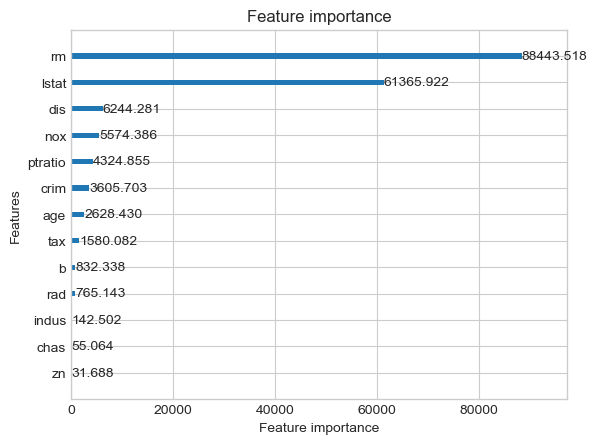

In [374]:
lgbm.plot_importance(booster=lgbmr,
                     importance_type="gain");

- plot metric

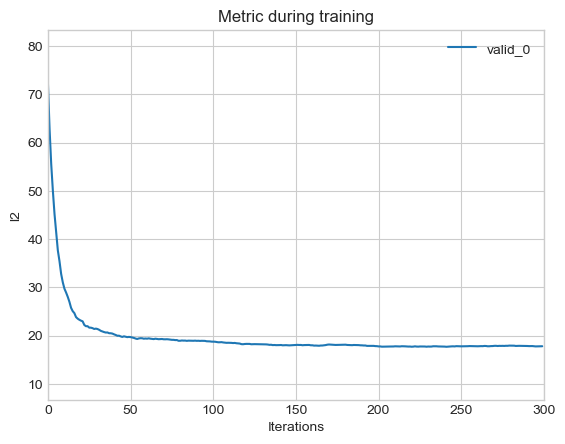

In [375]:
lgbm.plot_metric(booster=lgbmr);

- 트리 시각화

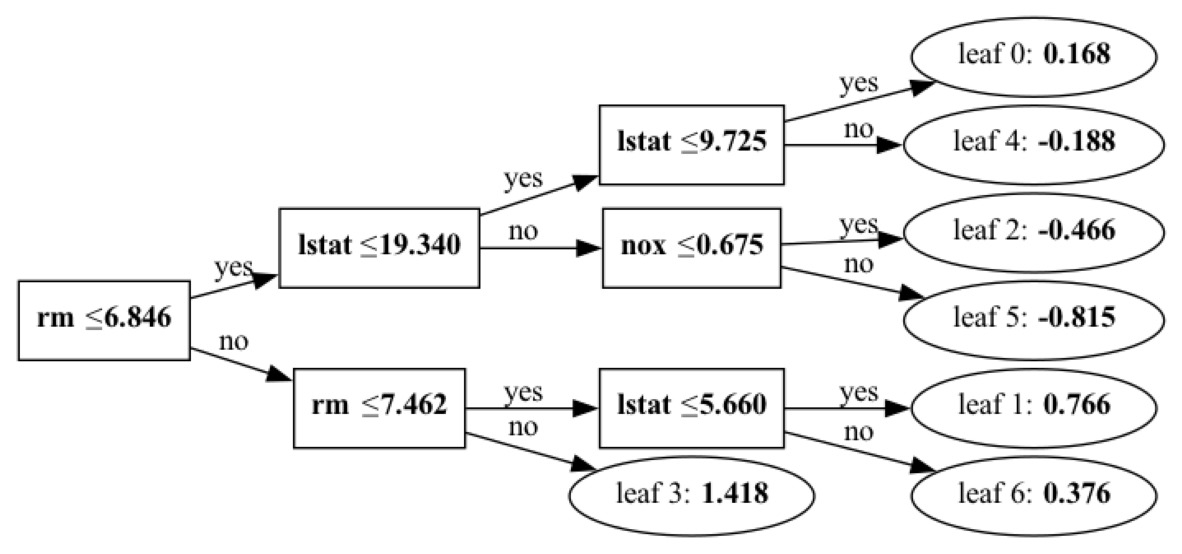

In [376]:
lgbm.plot_tree(booster=lgbmr,
               tree_index=5,
               figsize=(15, 10));

- 산점도 시각화

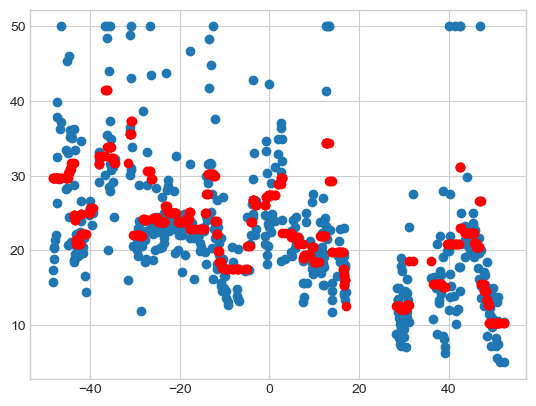

In [377]:
# 그래프에 나타내기 위해 차원 축소
X_comp = TSNE(n_components=1).fit_transform(X)

# 차원 축소한 데이터를 XGBoost 학습
lgbmr = LGBMRegressor(n_estimators=300, max_depth=3, learning_rate=0.1)
lgbmr.fit(X_comp, y, eval_metric="logloss")
y_predict = lgbmr.predict(X_comp)

# 실제 주택 가격
plt.scatter(X_comp, y)

# 예측 주택 가격
plt.scatter(X_comp, y_predict, color="r");

#### 캘리포니아 주택 가격

In [392]:
# 캘리포니아 주택 가격 데이터 불러오기
california = fetch_california_housing()

# 데이터프레임으로 만들기
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df["Target"] = california.target

# 학습/테스트 데이터 셋 분리
X = california_df.loc[:, california_df.columns != "Target"]
y = california_df["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
evals = [(X_test, y_test)]

# LightGBM 학습 및 예측 데이터 생성
lgbmr = LGBMRegressor(n_estimators=300, max_depth=3, learning_rate=0.1)
lgbmr.fit(X_train, y_train, eval_set=evals, eval_metric="logloss", early_stopping_rounds=100)
y_train_predict = lgbmr.predict(X_train)
y_test_predict = lgbmr.predict(X_test)

# 학습 데이터 모델 평가
r2 = r2_score(y_train, y_train_predict)
rmse = sqrt(mean_squared_error(y_train, y_train_predict))
print("Train R2 Score: {}".format(r2))
print("Train RMSE Score: {}".format(rmse))

# 평가 데이터 모델 평가
r2 = r2_score(y_test, y_test_predict)
rmse = sqrt(mean_squared_error(y_test, y_test_predict))
print("Train R2 Score: {}".format(r2))
print("Train RMSE Score: {}".format(rmse))

/Users/yanghaejun/opt/anaconda3/envs/yang_conda/lib/python3.8/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's l2: 1.19792
[2]	valid_0's l2: 1.09023
[3]	valid_0's l2: 0.995303
[4]	valid_0's l2: 0.917023
[5]	valid_0's l2: 0.851179
[6]	valid_0's l2: 0.799493
[7]	valid_0's l2: 0.75506
[8]	valid_0's l2: 0.716628
[9]	valid_0's l2: 0.679498
[10]	valid_0's l2: 0.651726
[11]	valid_0's l2: 0.626336
[12]	valid_0's l2: 0.601643
[13]	valid_0's l2: 0.583228
[14]	valid_0's l2: 0.564247
[15]	valid_0's l2: 0.548046
[16]	valid_0's l2: 0.526637
[17]	valid_0's l2: 0.513307
[18]	valid_0's l2: 0.502478
[19]	valid_0's l2: 0.491777
[20]	valid_0's l2: 0.480341
[21]	valid_0's l2: 0.468321
[22]	valid_0's l2: 0.450943
[23]	valid_0's l2: 0.44171
[24]	valid_0's l2: 0.429079
[25]	valid_0's l2: 0.422123
[26]	valid_0's l2: 0.414922
[27]	valid_0's l2: 0.407225
[28]	valid_0's l2: 0.401685
[29]	valid_0's l2: 0.396992
[30]	valid_0's l2: 0.387539
[31]	valid_0's l2: 0.382925
[32]	valid_0's l2: 0.377795
[33]	valid_0's l2: 0.371171
[34]	valid_0's l2: 0.367532
[35]	valid_0's l2: 0.362314
[36]	valid_0's l2: 0.359296
[37]	

- 교차검증 수행

In [393]:
# 교차검증 수행
score = cross_validate(estimator=lgbmr,
                       X=X, y=y,
                       cv=5,
                       n_jobs=multiprocessing.cpu_count())

# 교차검증 결과
print("avg fit time: {} (+/- {})".format(score["fit_time"].mean(), score["fit_time"].std()))
print("avg score time: {} (+/- {})".format(score["score_time"].mean(), score["score_time"].std()))
print("avg test score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

avg fit time: 0.12373538017272949 (+/- 0.001969355829028561)
avg score time: 0.022760391235351562 (+/- 0.0005492510028156298)
avg test score: 0.6900236517297985 (+/- 0.028643162600291316)


- 피처 중요도

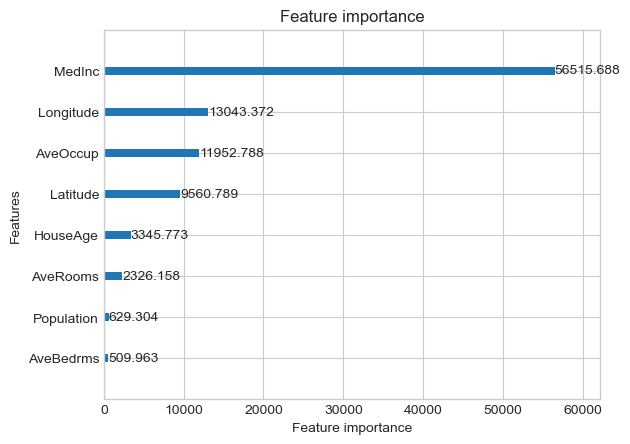

In [394]:
lgbm.plot_importance(booster=lgbmr,
                     importance_type="gain");

- 트리 시각화

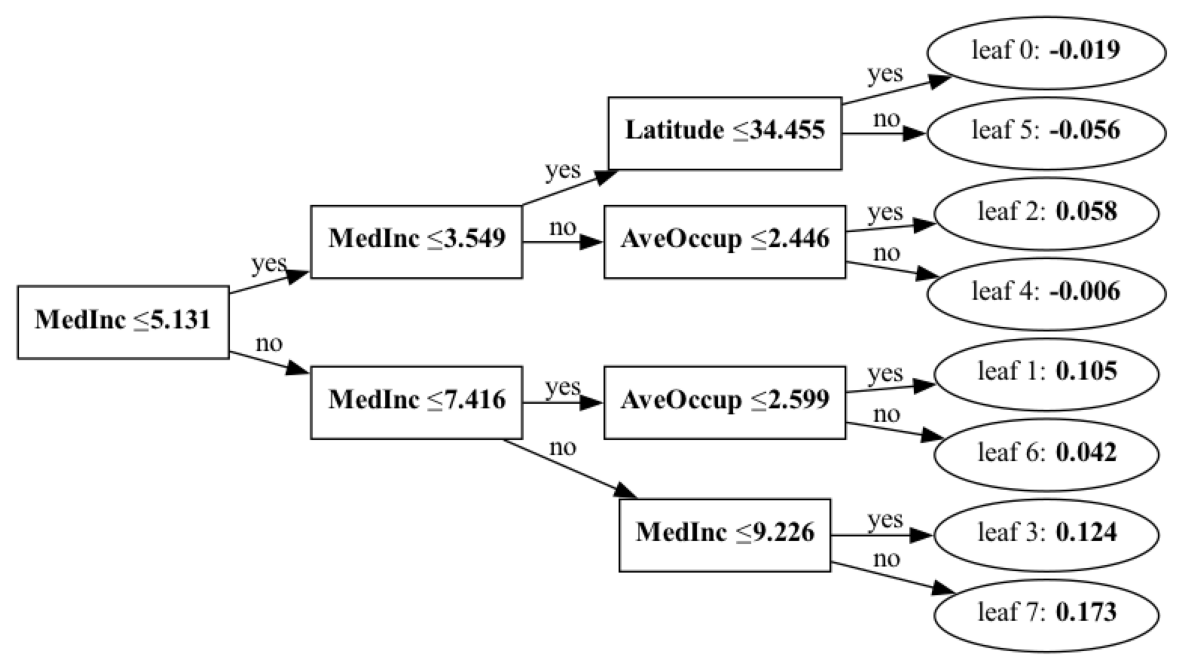

In [395]:
lgbm.plot_tree(booster=lgbmr,
               tree_index=5,
               figsize=(15, 10));

- 산점도 시각화

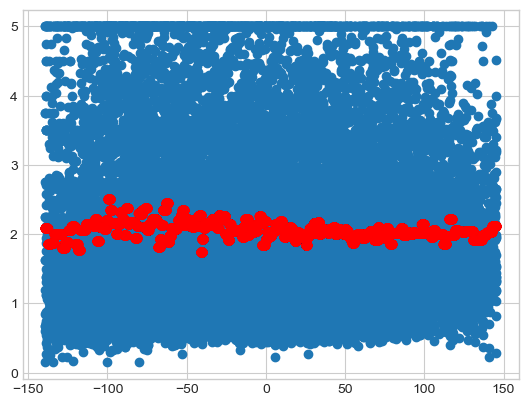

In [396]:
# 그래프에 나타내기 위해 차원 축소
X_comp = TSNE(n_components=1).fit_transform(X)

# 차원 축소한 데이터를 LightGBM 학습 및 예측 데이터 생성
lgbmr = LGBMRegressor(n_estimators=300, max_depth=3, learning_rate=0.1)
lgbmr.fit(X_comp, y)
y_predict = lgbmr.predict(X_comp)

# 실제 주택 가격
plt.scatter(X_comp, y)

# 예측 주택 가격
plt.scatter(X_comp, y_predict, color="r")

plt.show()

#### 당뇨병 데이터

In [383]:
# 당뇨병 데이터 불러오기
diabetes = load_diabetes()

# 데이터프레임으로 만들기
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df["Target"] = diabetes.target

# 학습/테스트 데이터 셋 분리
X = diabetes_df.loc[:, diabetes_df.columns != "Target"]
y = diabetes_df["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
evals = [(X_test, y_test)]

# LightGBM 학습 및 예측 데이터 생성
lgbmr = LGBMRegressor(n_estimators=400, max_depth=3, learning_rate=0.01)
lgbmr.fit(X_train, y_train, eval_set=evals, eval_metric="logloss")
y_train_predict = lgbmr.predict(X_train)
y_test_predict = lgbmr.predict(X_test)

# 학습 데이터 모델 평가
r2 = r2_score(y_train, y_train_predict)
rmse = sqrt(mean_squared_error(y_train, y_train_predict))
print("Train R2 Score: {}".format(r2))
print("Train RMSE Score: {}".format(rmse))

# 평가 데이터 모델 평가
r2 = r2_score(y_test, y_test_predict)
rmse = sqrt(mean_squared_error(y_test, y_test_predict))
print("Train R2 Score: {}".format(r2))
print("Train RMSE Score: {}".format(rmse))

[1]	valid_0's l2: 6246.5
[2]	valid_0's l2: 6191.81
[3]	valid_0's l2: 6135.61
[4]	valid_0's l2: 6083.01
[5]	valid_0's l2: 6028.9
[6]	valid_0's l2: 5977.01
[7]	valid_0's l2: 5924.88
[8]	valid_0's l2: 5874.95
[9]	valid_0's l2: 5824.74
[10]	valid_0's l2: 5776.69
[11]	valid_0's l2: 5728.75
[12]	valid_0's l2: 5682.45
[13]	valid_0's l2: 5636.19
[14]	valid_0's l2: 5591.58
[15]	valid_0's l2: 5546.92
[16]	valid_0's l2: 5503.94
[17]	valid_0's l2: 5460.57
[18]	valid_0's l2: 5419.16
[19]	valid_0's l2: 5377.3
[20]	valid_0's l2: 5337.38
[21]	valid_0's l2: 5294.15
[22]	valid_0's l2: 5254.35
[23]	valid_0's l2: 5217.55
[24]	valid_0's l2: 5179.18
[25]	valid_0's l2: 5141.59
[26]	valid_0's l2: 5106.71
[27]	valid_0's l2: 5070.43
[28]	valid_0's l2: 5036.83
[29]	valid_0's l2: 5002.79
[30]	valid_0's l2: 4968.31
[31]	valid_0's l2: 4937.31
[32]	valid_0's l2: 4904.45
[33]	valid_0's l2: 4872.6
[34]	valid_0's l2: 4843.35
[35]	valid_0's l2: 4813.11
[36]	valid_0's l2: 4782.83
[37]	valid_0's l2: 4753.45
[38]	valid_0's

- 교차검증 수행

In [384]:
# 교차검증 수행
score = cross_validate(estimator=lgbmr,
                       X=X, y=y,
                       cv=5,
                       n_jobs=multiprocessing.cpu_count())

# 교차검증 결과
print("avg fit time: {} (+/- {})".format(score["fit_time"].mean(), score["fit_time"].std()))
print("avg score time: {} (+/- {})".format(score["score_time"].mean(), score["score_time"].std()))
print("avg test score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

avg fit time: 0.04018220901489258 (+/- 0.002549830098123534)
avg score time: 0.00209956169128418 (+/- 6.547712144151483e-05)
avg test score: 0.44864070904089914 (+/- 0.041744852535951275)


- 피처 중요도

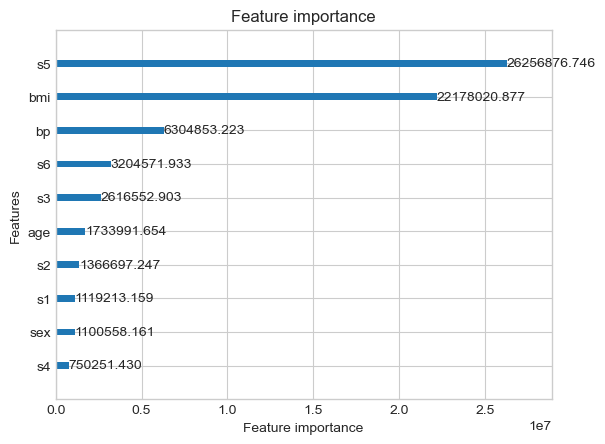

In [385]:
lgbm.plot_importance(booster=lgbmr,
                     importance_type="gain");

- 트리 시각화

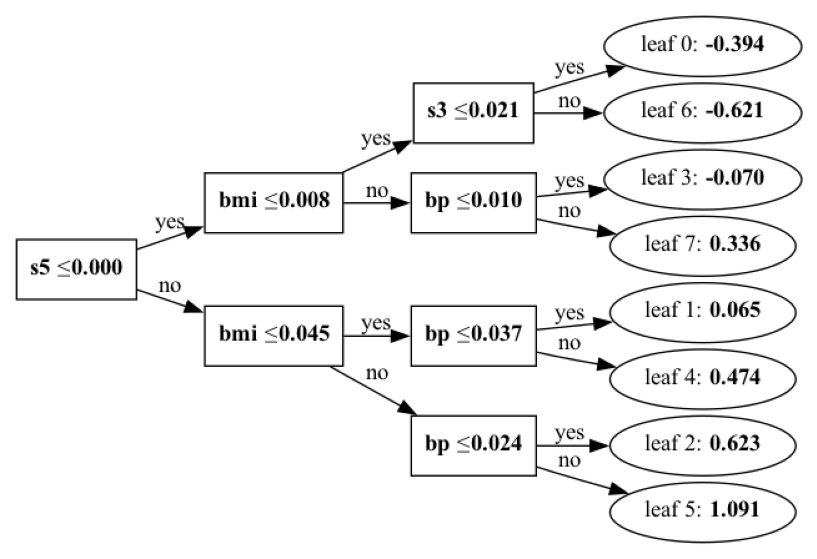

In [386]:
fig, ax = plt.subplots(figsize=(12, 7))
lgbm.plot_tree(booster=lgbmr,
               tree_index=5,
               ax=ax);

- 산점도 시각화

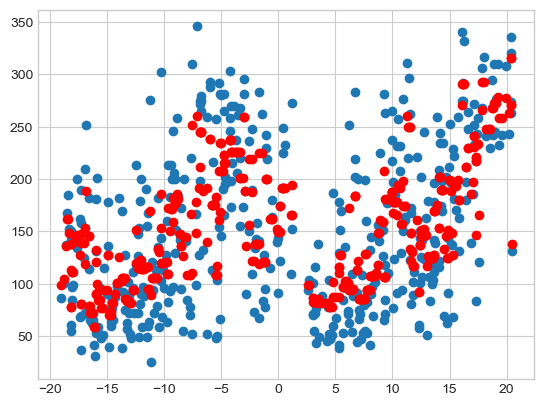

In [387]:
# 그래프에 나타내기 위해 차원 축소
X_comp = TSNE(n_components=1).fit_transform(X)

# 차원 축소한 데이터를 XGBoost 학습 및 예측 데이터 생성
lgbmr = LGBMRegressor(n_estimators=400, max_depth=3, learning_rate=0.01)
xgbr.fit(X_comp, y)
y_predict = xgbr.predict(X_comp)

# 실제 당뇨 수치
plt.scatter(X_comp, y)

# 예측 당뇨 수치
plt.scatter(X_comp, y_predict, color="r")

plt.show()

## XGBoost, LightGBM 비교 시각화

### 분류 - Classifier

In [388]:
# 모델들
model1 = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3, random_state=123)
model2 = LGBMClassifier(n_estimators=400, learning_rate=0.1, max_depth=3, random_state=123)

/Users/yanghaejun/opt/anaconda3/envs/yang_conda/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


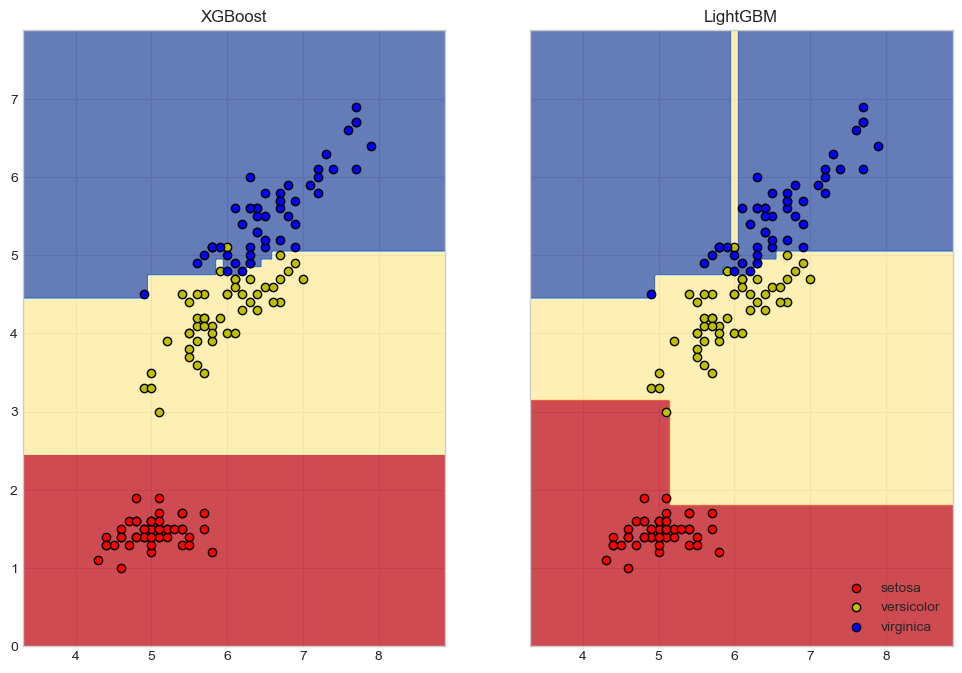

In [389]:
# figure 생성
fig, ax = plt.subplots(1, 2, sharex="col", sharey="row", figsize=(12, 8))

colors = ["r", "y", "b"]
for idx, model, title in zip([[0, 0], [0, 1]],
                             [model1, model2],
                             ["XGBoost", "LightGBM"]):
    # 데이터
    X = iris.data[:, [0, 2]]
    y = iris.target

    # 모델 학습
    model.fit(X, y, eval_metric="logloss")

    # 각 클래스를 구분해줄 데이터 생성
    xx, yy = get_meshgrid(X[:, 0], X[:, 1])
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # 각 클래스의 영역 구분
    ax[idx[1]].contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

    # 산점도로 시각화
    for i in range(len(np.unique(species))):
        ax[idx[1]].scatter(X[y == i, 0], X[y == i, 1], edgecolors="k", color=colors[i], label=species[i])

    # 모델 이름 생성
    ax[idx[1]].set_title(title)

plt.legend(loc="lower right")
plt.show()

### 회귀 - Regressor

In [390]:
# 데이터
X = boston_data[:, 0].reshape(-1, 1)
y = boston_target
X_test = np.array(np.arange(X.min()-1, X.max(), 0.5)).reshape(-1, 1)

# 모델들
model1 = XGBRegressor(n_estimators=300, max_depth=3, learning_rate=0.1)
model2 = LGBMRegressor(n_estimators=300, max_depth=3, learning_rate=0.1)

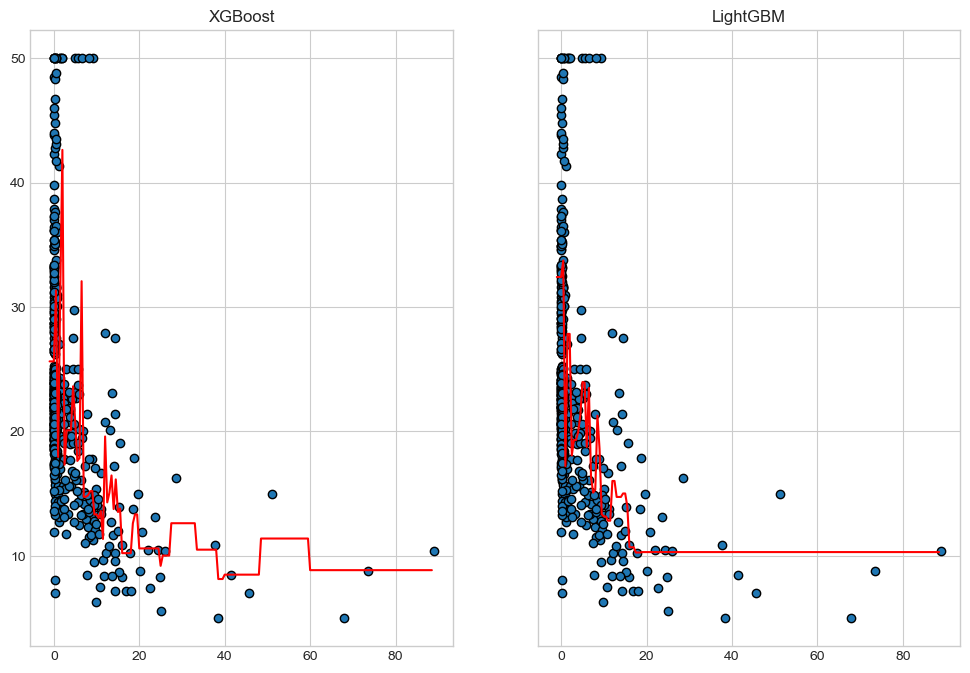

In [391]:
# figure 생성
fig, ax = plt.subplots(1, 2, sharex="col", sharey="row", figsize=(12, 8))

for idx, model, title in zip([[0, 0], [0, 1]],
                             [model1, model2],
                             ["XGBoost", "LightGBM"]):
    # 모델 학습 및 예측 데이터 생성
    model.fit(X, y)
    y_predict = model.predict(X_test)

    # 실제 주택 가격
    ax[idx[1]].scatter(X, y, edgecolors="k")

    # 예측 주택 가격
    ax[idx[1]].plot(X_test, y_predict, color="r")

    # 모델 이름 생성
    ax[idx[1]].set_title(title)

plt.show()